# Importing All required Libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Reading Data

In [8]:
x_train = np.genfromtxt('x_train.csv', delimiter = ',')[1:, 1:]
x_validate = np.genfromtxt('x_validate.csv', delimiter = ',')[1:, 1:]
x_test = np.genfromtxt('x_test.csv', delimiter = ',')[1:, 1:]

In [9]:
y_train = np.genfromtxt('y_train.csv', delimiter = ',')[1:, 1:]
y_train = y_train.reshape(y_train.shape[0])

y_test = np.genfromtxt('y_test.csv', delimiter = ',')[1:, 1:]
y_test = y_test.reshape(y_test.shape[0])

y_validate = np.genfromtxt('y_validate.csv', delimiter = ',')[1:, 1:]
y_validate = y_validate.reshape(y_validate.shape[0])

# Base Line Model

In [66]:
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Classification Report : \n\n", classification_report(y_test, y_pred))
print("\n\nAccuracy : ", accuracy_score(y_test, y_pred))
print("\n\nConfusion Matrix : \n\n", confusion_matrix(y_test, y_pred))

Classification Report : 

               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       879
         2.0       0.99      0.99      0.99       888
         3.0       0.97      0.99      0.98       878
         4.0       0.86      0.94      0.90       897
         5.0       0.98      0.95      0.96       874
         6.0       0.88      0.92      0.90       883
         7.0       0.93      0.86      0.90       898
         8.0       1.00      0.95      0.98       843

    accuracy                           0.95      7040
   macro avg       0.95      0.95      0.95      7040
weighted avg       0.95      0.95      0.95      7040



Accuracy :  0.9492897727272728


Confusion Matrix : 

 [[876   0   1   0   1   1   0   0]
 [  0 883   0   2   0   3   0   0]
 [  0   0 866  11   0   1   0   0]
 [  0   0   6 844   2  11  34   0]
 [  0   1   6   0 826  41   0   0]
 [  0  11   9  18  11 813  21   0]
 [  0   1   0  66   3  56 772   0]
 [  0   0   4  36   

# Effect of n_neighbors on accuracy

In [19]:
x_axis = []
y_axis = []
for i in range(1, 22, 2):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_validate)
    print(i, " : ", accuracy_score(y_validate, y_pred))
    x_axis.append(i)
    y_axis.append(accuracy_score(y_validate, y_pred))

1  :  0.944034090909091
3  :  0.9511363636363637
5  :  0.9552556818181818
7  :  0.9546875
9  :  0.9546875
11  :  0.9526988636363637
13  :  0.9526988636363637
15  :  0.9526988636363637
17  :  0.953125
19  :  0.9529829545454546
21  :  0.9522727272727273


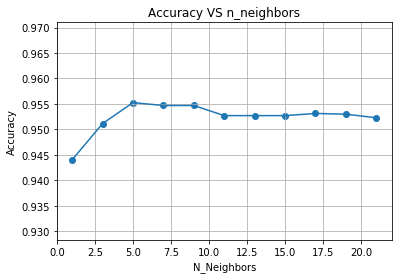

In [29]:
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, y_axis)
plt.xlabel('N_Neighbors')
plt.ylabel('Accuracy')
plt.title("Accuracy VS n_neighbors")
plt.grid()
plt.show()

In [21]:
n_neighbor_optimal = -1
optimal_accuracy = -1
for i in range(len(x_axis)):
    if y_axis[i] > optimal_accuracy:
        optimal_accuracy = y_axis[i]
        n_neighbor_optimal = x_axis[i]
print("Optima n_neighbor : ", n_neighbor_optimal)

Optima n_neighbor :  5


In [33]:
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
y_pred = clf.predict(x_test)
print("Classification Report : \n\n", classification_report(y_test, y_pred))
print("\n\nAccuracy : ", accuracy_score(y_test, y_pred))
print("\n\nConfusion Matrix : \n\n", confusion_matrix(y_test, y_pred))

Classification Report : 

               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       879
         2.0       0.99      0.99      0.99       888
         3.0       0.97      0.99      0.98       878
         4.0       0.86      0.94      0.90       897
         5.0       0.98      0.95      0.96       874
         6.0       0.88      0.92      0.90       883
         7.0       0.93      0.86      0.90       898
         8.0       1.00      0.95      0.98       843

    accuracy                           0.95      7040
   macro avg       0.95      0.95      0.95      7040
weighted avg       0.95      0.95      0.95      7040



Accuracy :  0.9492897727272728


Confusion Matrix : 

 [[876   0   1   0   1   1   0   0]
 [  0 883   0   2   0   3   0   0]
 [  0   0 866  11   0   1   0   0]
 [  0   0   6 844   2  11  34   0]
 [  0   1   6   0 826  41   0   0]
 [  0  11   9  18  11 813  21   0]
 [  0   1   0  66   3  56 772   0]
 [  0   0   4  36   

# weights on Accuracy

In [52]:
weights = ['uniform', 'distance']
y_preds = []
for w in weights:
    clf = KNeighborsClassifier(weights = w)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_validate)
    print(w, " : ", accuracy_score(y_validate, y_pred))
    y_preds.append(accuracy_score(y_validate, y_pred))

uniform  :  0.9552556818181818
distance  :  0.9575284090909091


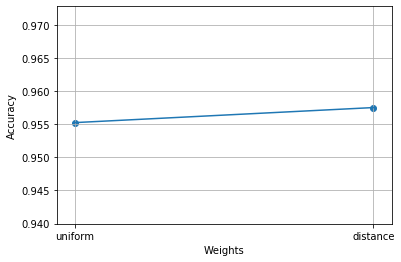

In [53]:
plt.scatter(weights, y_preds)
plt.plot(weights, y_preds)
plt.xlabel('Weights')
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [54]:
clf = KNeighborsClassifier(weights = 'distance')
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [55]:
y_pred = clf.predict(x_test)
print("Classification Report : \n\n", classification_report(y_test, y_pred))
print("\n\nAccuracy : ", accuracy_score(y_test, y_pred))
print("\n\nConfusion Matrix : \n\n", confusion_matrix(y_test, y_pred))

Classification Report : 

               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       879
         2.0       0.99      0.99      0.99       888
         3.0       0.98      0.99      0.98       878
         4.0       0.87      0.94      0.90       897
         5.0       0.98      0.95      0.96       874
         6.0       0.88      0.93      0.90       883
         7.0       0.93      0.87      0.90       898
         8.0       1.00      0.95      0.98       843

    accuracy                           0.95      7040
   macro avg       0.95      0.95      0.95      7040
weighted avg       0.95      0.95      0.95      7040



Accuracy :  0.9501420454545455


Confusion Matrix : 

 [[876   0   1   0   1   1   0   0]
 [  0 883   0   2   0   3   0   0]
 [  0   0 865  12   0   1   0   0]
 [  0   0   5 841   2  12  37   0]
 [  0   1   5   0 826  42   0   0]
 [  0  10   7  16  10 817  23   0]
 [  0   1   0  65   2  53 777   0]
 [  0   0   3  35   

# Effect Of Algorithms on Classifier

In [56]:
algorithms = ['auto', 'kd_tree', 'ball_tree']
y_preds = list()
for algorithm in algorithms:
    clf = KNeighborsClassifier(algorithm = algorithm)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_validate)
    print(algorithm, " : ", accuracy_score(y_validate, y_pred))
    y_preds.append(accuracy_score(y_validate, y_pred))

auto  :  0.9552556818181818
kd_tree  :  0.9552556818181818
ball_tree  :  0.9552556818181818


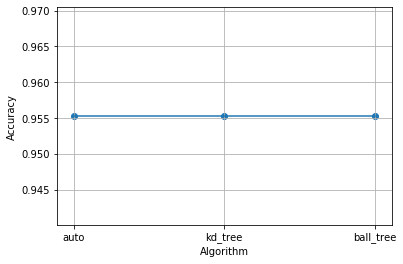

In [57]:
plt.scatter(algorithms, y_preds)
plt.plot(algorithms, y_preds)
plt.grid()
plt.ylabel("Accuracy")
plt.xlabel("Algorithm")
plt.show()

In [58]:
print("So Algorithm type is not changing the Accuracy")

So Algorithm type is not changing the Accuracy


# Finding optimal Classifier

In [63]:
n_neighbors = [i for i in range(1, 22, 2)]
weights = ['uniform', 'distance']
algorithms = ['auto', 'kd_tree', 'ball_tree']
optimal_n_neighbor = -1
optimal_weight = ''
optimal_algo = ''
max_acc = -1
for i in n_neighbors:
    for w in weights:
        for algo in algorithms:
            clf = KNeighborsClassifier(n_neighbors = i, weights = w, algorithm = algo)
            clf.fit(x_train, y_train)
            y_pred = clf.predict(x_validate)
            acc = accuracy_score(y_validate, y_pred)
            if acc > max_acc:
                max_acc = acc
                optima_n_neighbor = i
                optimal_weight = w
                optimal_algo = algo

In [65]:
print("optima_n_neighbor : ", optima_n_neighbor)
print("optimal_weight : ", optimal_weight)
print("optimal_algo : ", optimal_algo)

optima_n_neighbor :  5
optimal_weight :  distance
optimal_algo :  auto


In [68]:
clf = KNeighborsClassifier(n_neighbors = optima_n_neighbor, weights = optimal_weight, algorithm = optimal_algo)

In [69]:
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [70]:
y_pred = clf.predict(x_test)
print("Classification Report : \n\n", classification_report(y_test, y_pred))
print("\n\nAccuracy : ", accuracy_score(y_test, y_pred))
print("\n\nConfusion Matrix : \n\n", confusion_matrix(y_test, y_pred))

Classification Report : 

               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       879
         2.0       0.99      0.99      0.99       888
         3.0       0.98      0.99      0.98       878
         4.0       0.87      0.94      0.90       897
         5.0       0.98      0.95      0.96       874
         6.0       0.88      0.93      0.90       883
         7.0       0.93      0.87      0.90       898
         8.0       1.00      0.95      0.98       843

    accuracy                           0.95      7040
   macro avg       0.95      0.95      0.95      7040
weighted avg       0.95      0.95      0.95      7040



Accuracy :  0.9501420454545455


Confusion Matrix : 

 [[876   0   1   0   1   1   0   0]
 [  0 883   0   2   0   3   0   0]
 [  0   0 865  12   0   1   0   0]
 [  0   0   5 841   2  12  37   0]
 [  0   1   5   0 826  42   0   0]
 [  0  10   7  16  10 817  23   0]
 [  0   1   0  65   2  53 777   0]
 [  0   0   3  35   

In [73]:
print("Optimal Classifier : ", clf)
print("\n\nMaximum Accuracy Achieved : ", accuracy_score(y_test, y_pred))

Optimal Classifier :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')


Maximum Accuracy Achieved :  0.9501420454545455
